In [6]:
import sympy
sympy.init_printing()

Installation of sympy with
pip3 install sympy

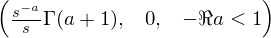

In [7]:
from sympy.integrals import laplace_transform
from sympy.abc import t, s, a
laplace_transform(t**a, t, s)
#(s**(-a)*gamma(a + 1)/s, 0, -re(a) < 1)

In [8]:
from sympy import *
b=Symbol('b', real=True, negative=True)
laplace_transform(exp(-b*t), t, s)

In [15]:
help(inverse_laplace_transform)

Help on function inverse_laplace_transform in module sympy.integrals.transforms:

inverse_laplace_transform(F, s, t, plane=None, **hints)
    Compute the inverse Laplace transform of `F(s)`, defined as
    
    .. math :: f(t) = \int_{c-i\infty}^{c+i\infty} e^{st} F(s) \mathrm{d}s,
    
    for `c` so large that `F(s)` has no singularites in the
    half-plane `\operatorname{Re}(s) > c-\epsilon`.
    
    The plane can be specified by
    argument ``plane``, but will be inferred if passed as None.
    
    Under certain regularity conditions, this recovers `f(t)` from its
    Laplace Transform `F(s)`, for non-negative `t`, and vice
    versa.
    
    If the integral cannot be computed in closed form, this function returns
    an unevaluated :class:`InverseLaplaceTransform` object.
    
    Note that this function will always assume `t` to be real,
    regardless of the sympy assumption on `t`.
    
    For a description of possible hints, refer to the docstring of
    :func:`sympy.int

Use the PFE method to simplify $F_1(s)$ below and find the time domain function $f_1(t)$ corresponding to $F_1(s)$

$$F_1(s) = \frac{2s+5}{s^2 + 5s + 6}$$

(Quick solution: [Wolfram|Alpha](http://www.wolframalpha.com/input/?i=inverse+laplace+transform+%282s+%2B+5%29%2F%28s%5E2+%2B+5s+%2B+6%29))

In [12]:
s=Symbol('s')
F1 = (2*s+5)/(s**2 + 5*s + 6)

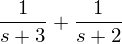

In [13]:
apart(F1)

In [16]:
inverse_laplace_transform(F1,s,t)

Determine the Inverse Laplace Transform of

$$F_2(s) = \frac{3s^2+2s+5}{s^3 + 9s^s + 23s + 15}$$

(Quick solution: [Wolfram|Alpha](http://www.wolframalpha.com/input/?i=inverse+laplace+transform+%283s%5E2+%2B+2s+%2B+5%29%2F%28s%5E3+%2B+9s%5E2+%2B+23s+%2B+15%29))

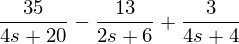

In [19]:
apart((3*s**2+2*s+5)/(s**3 + 9*s**2 + 23*s + 15))

We can now use the previous technique to find the solution which according to Sympy should be

$$f_1(t) = \frac{3}{4}e^{-t} - \frac{13}{2}e^{-3t} + \frac{35}{4}e^{-5t}$$

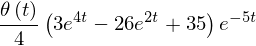

In [21]:
F2=(3*s**2+2*s+5)/(s**3 + 9*s**2 + 23*s + 15)
inverse_laplace_transform(F2,s,t)

In [18]:
factor(s**3 + 9*s**2 + 23*s + 15)

### With complex poles

Rework Example 3-2 from the text book using quadratic factors.

Find the Inverse Laplace Transform of 

$$F_3(s) = \frac{s + 3}{(s+1)(s^2 + 4s + 8)}$$

(Quick solution: [Wolfram|Alpha](http://www.wolframalpha.com/input/?i=inverse+laplace+transform+%28s%2B3%29%2F%28%28s+%2B+1%29%28s%5E2+%2B+4s+%2B+8%29%29) &ndash; Shows that the computer is not always best!)

In [22]:
F3=(s + 3)/((s+1)*(s**2 + 4*s + 8))

In [25]:
out=inverse_laplace_transform(F3,s,t)
print(out)

5*(4*exp(t) + 3*sin(2*t) - 4*cos(2*t))*exp(-2*t)*Heaviside(t)/(2*(1 - 2*I)**2*(1 + 2*I)**2)


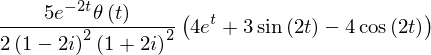

In [26]:
out

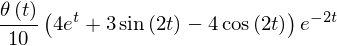

In [27]:
simplify(out)

We complete the square 

$$s^2 + 4s + 8 = (s + 2)^2 + 4$$

Then comparing this with the desired form $(s - a)^2 + \omega^2$, we have $a = -2$ and $\omega^2 = 4 \to \omega = \sqrt{4} = 2$.

To solve this, we need to find the PFE for the assumed solution:

$$F_3(s) = \frac{r_1}{s+1} + \frac{r_2s}{(s + 2)^2 + 4} + \frac{r_3(s+2)}{(s + 2)^2 + 4}$$

expecting the solution

$$f_3(t) = \frac{2}{5}e^{-t} + \frac{3}{10}\sin 2t - \frac{2}{5}\cos 2t$$

You can use trig. identities to simplify this further if you wish.



Find the inverse Laplace Transform of 

$$F_4(s) = \frac{s+3}{(s+2)(s+1)^2}$$

Note that the transform

$$te^{at} \Leftrightarrow \frac{1}{(s - a)^2}$$

will be useful.

(Quick solution: [Wolfram|Alpha](http://www.wolframalpha.com/input/?i=inverse+laplace+transform+%28s%2B3%29%2F%28%28s%2B2%29%28s+%2B+1%29%5E2%29))

In [31]:
F4 = (s+3)/((s+2)*(s+1)**2)
inverse_laplace_transform(F4,s,t)

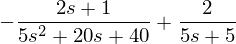

In [36]:
zz=apart(F3)
zz

In [42]:
str(zz)


'-(2*s + 1)/(5*(s**2 + 4*s + 8)) + 2/(5*(s + 1))'

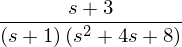

In [35]:
factor(zz)